# Week4 - Lab

### Complete _todo_ parts in the following:

# pranav
# pavan 
# ashok 
# sri harsha
# charan 

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [73]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [74]:
df.head()

,X1,X2,y
0,0.000000,A,8.763705
1,0.000628,B,6.913720
2,0.001257,A,9.602194
3,0.001885,A,7.016502
4,0.002514,B,-3.090299


<Axes: title={'center': 'visualised data separated by categories A and B'}, xlabel='X1', ylabel='y'>

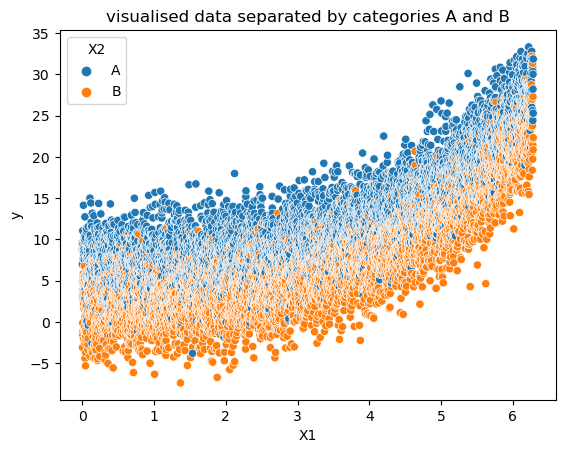

In [75]:
# todo: add a proper title
#plot shows 
plt.title("visualised data separated by categories A and B")
sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: title={'center': 'visualised data separated by categories A and B'}, xlabel='X1', ylabel='y'>

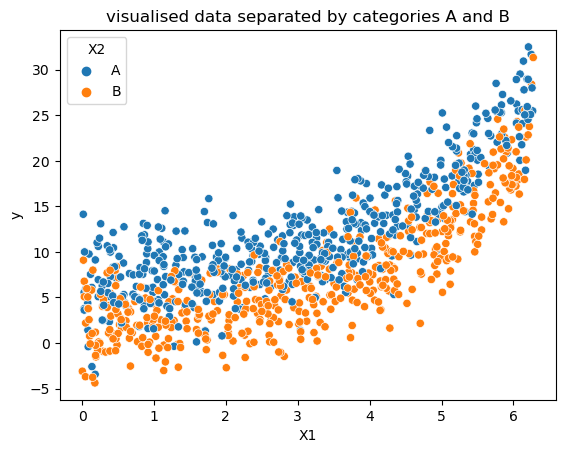

In [76]:
# todo: add the same title as above
plt.title("visualised data separated by categories A and B")
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo: 
explain findings in the graphs

In [77]:
X = df[['X1', 'X2']]
y = df.y

In [78]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,B
2,0.001257,A
3,0.001885,A
4,0.002514,B


In [79]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5781844182697744

In [80]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5781844182697744

## the model score and the r2 value closely resemble each other it explains why the data is distributed in the above manner as the plot line we got lies exactly in between the A and B samples and the rest of the samples are distributed above or below the predicted line 

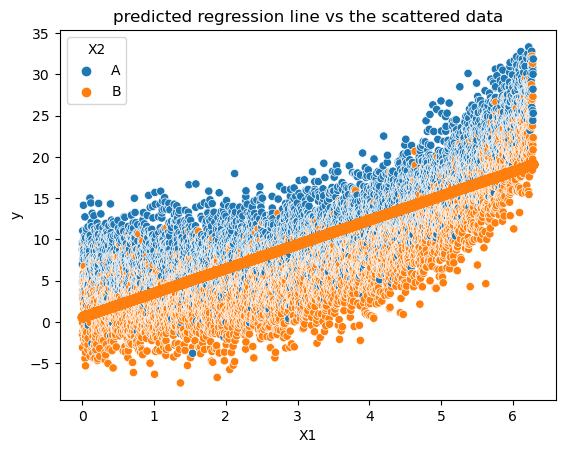

In [81]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
#plt.scatter(X.X1, y) 
#plt.scatter(X.X1, y_pred)

# todo: add a proper title
plt.title("predicted regression line vs the scattered data")
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

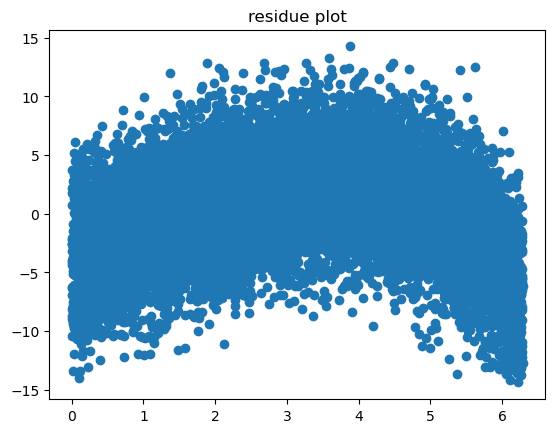

In [82]:
# todo: add a proper title
plt.title("residue plot")
plt.scatter(X.X1, y_pred-y)

<Axes: title={'center': 'distribution of the residue'}>

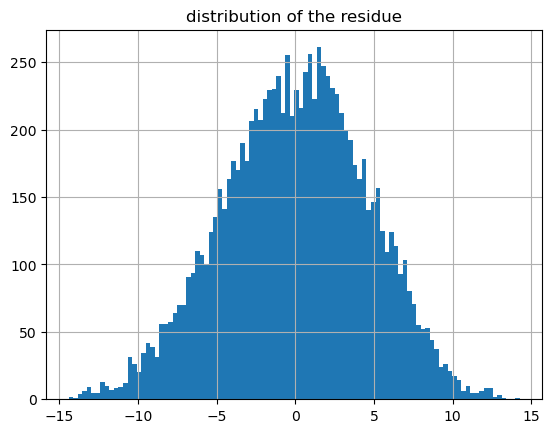

In [83]:
# todo: add a proper title
plt.title("distribution of the residue")
(y_pred-y).hist(bins=100)

#### Todo: 
Explain findings in the graphs above & what we can try next

# the residue plot shows a clear pattern (i.e a curve) we could use higher degree regression as the plots show a neat curvature the curve is parabolic when viewed so we could use degree 2

In [84]:
# todo: explain the code below, what we do & why we do it? 
# we do this as we see the plot between x1 and y as the plot is like a curve closely representing a quadratic equation
transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6787807905651391

In [85]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6787807905651391

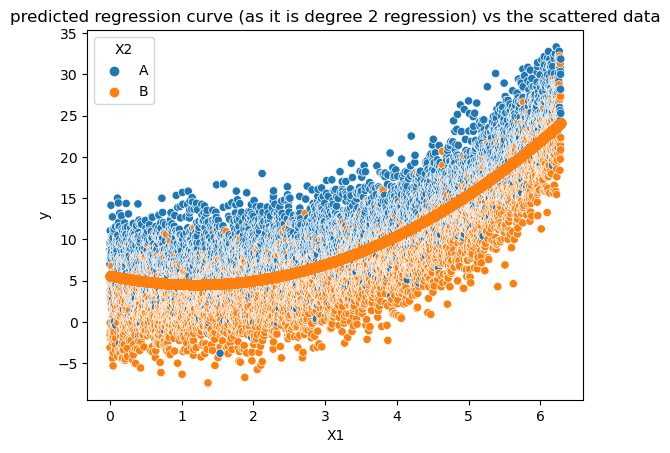

In [86]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title
plt.title("predicted regression curve (as it is degree 2 regression) vs the scattered data")
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

<Axes: title={'center': 'residue plot'}>

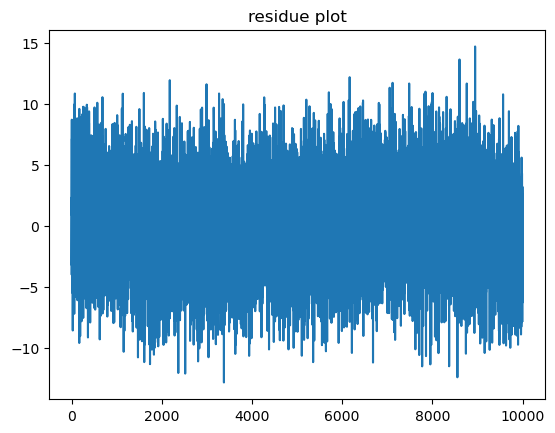

In [87]:
# todo: add a proper title
plt.title("residue plot")
(y_pred-y).plot()

<Axes: title={'center': 'distribution of residue'}>

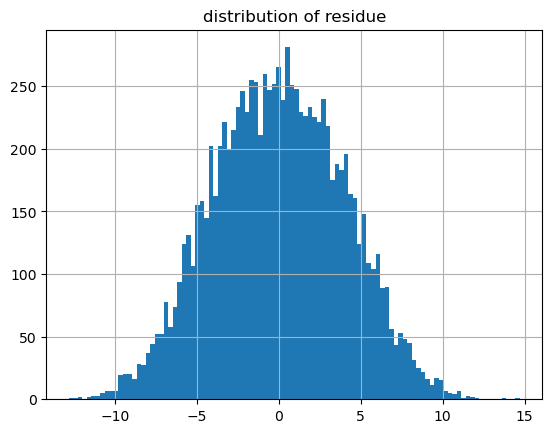

In [88]:
# todo: add a proper title
plt.title("distribution of residue")
(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next? 

# this time the regression curve increased r2 square making the model more fit for the data and also the residue this time is more linear but still we can find that the distribution of residue remained same to reduce the magnitude of this error we could use encoding the categorical variables and probably use them as weights to make the model more fit to the data

##  Finally:

In [89]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()
 
# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [90]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [91]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [92]:
encoded_df.head()

,X2_B
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [96]:
# todo: explain the code
# this is creating a new data framing by extracting just the nuerical columns and joining the categorical dataframe which was created above
numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,1.0
2,0.001257,0.0
3,0.001885,0.0
4,0.002514,1.0


In [99]:
# todo: explain the code
# here we extract all the ploynomial features upto degree three i.e 1,X1,X2_B,X*X2_B,X*X,X2_B*X2_B and add it to a linear regression model
poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.8093476583853778

In [98]:
X_data

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.28381369e-04, 1.00000000e+00, 3.94863145e-07,
        6.28381369e-04, 1.00000000e+00],
       [1.00000000e+00, 1.25676274e-03, 0.00000000e+00, 1.57945258e-06,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.28192854e+00, 1.00000000e+00, 3.94626262e+01,
        6.28192854e+00, 1.00000000e+00],
       [1.00000000e+00, 6.28255693e+00, 0.00000000e+00, 3.94705215e+01,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.28318531e+00, 0.00000000e+00, 3.94784176e+01,
        0.00000000e+00, 0.00000000e+00]])

In [95]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8093476583853778

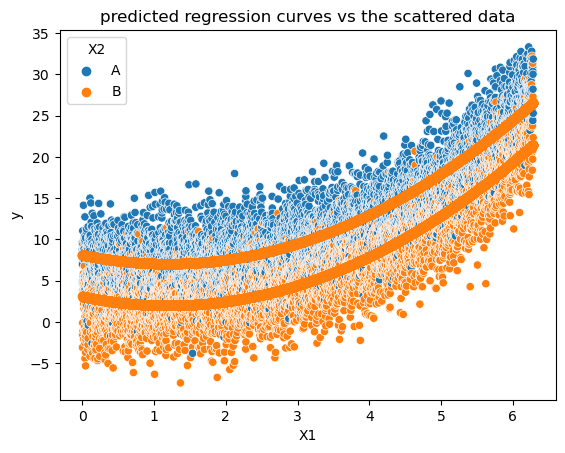

In [100]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title
plt.title("predicted regression curves vs the scattered data")
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

<Axes: title={'center': 'residue plot'}>

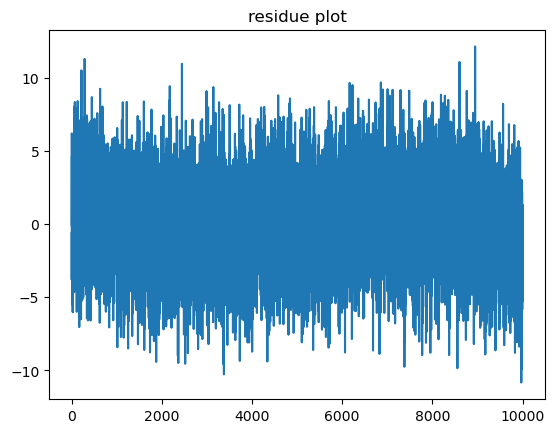

In [104]:
# todo: add a proper title
plt.title("residue plot")
(y_pred-y).plot()

<Axes: title={'center': 'distribution of residue'}>

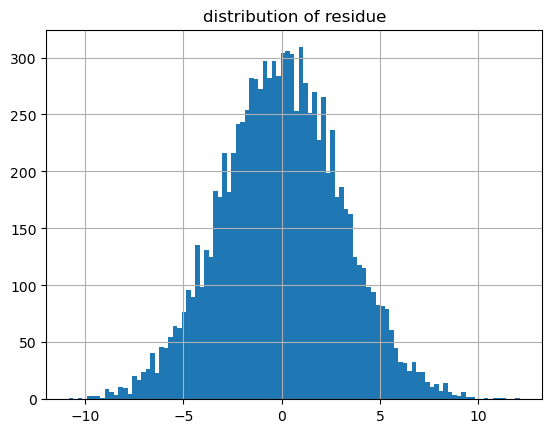

In [105]:
# todo: add a proper title
plt.title("distribution of residue")
(y_pred-y).hist(bins=100)

#### Todo: 
explain results

# this time we encoded categorical features and extracted the polynomial features which increased the r2score and also the plot shows two curves as we which is a better fit to the data as we could visually differentiate the difference in A and B categorical values which was now solved by having two curves

## Create a train-test split

In [107]:
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 8,000
Test samples: 2,000


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `transform` NOT `fit_transform` 
 
 __eg:__ `encoded = encoder.transform(X_test[categorical_features])`
     

In [ ]:
# code
categorical_features = ['X2']
encoded = encoder.transform(X_training[categorical_features])

In [ ]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

## Create a pipeline

Add comments to `todo` parts

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

In [ ]:
modeling_pipeline.fit(X_training, y_training)

In [ ]:
modeling_pipeline.score(X_test, y_test)

## Evaluate/create residual plots

In [ ]:
y_pred = modeling_pipeline.predict(X_test)

In [ ]:
# code

## Explain findings

Explain findings